## Importing library

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import sys
sys.path.append("../test/data_preprocess.py")
sys.path.append("../test/confusion_matrix.py")
from data_preprocess import load_data
from confusion_matrix import confusion_matrix

D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

## Loding data

In [42]:
X_train_temp, X_test_temp, y_train, y_test = load_data(20,50,False)
print(X_train_temp.shape, y_train.shape)
print(X_test_temp.shape, y_test.shape)

(7352, 128, 12) (7352, 6)
(2947, 128, 12) (2947, 6)


## Function

In [33]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
    plt.clf()

# Neural Network

In [34]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Flatten,LSTM
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

In [35]:
sample = len(X_train_temp)
train_row = len(X_train_temp[0])
train_col = len(X_train_temp[0][0])
channel = 1
validation_split = 0.1
print(sample, train_row, train_col, channel)

7352 128 12 1


## RNN model

In [40]:
model_RNN = Sequential()
model_RNN.add(LSTM(64, input_shape=(train_row, train_col)))
model_RNN.add(Dropout(0.5))
model_RNN.add(Dense(6, activation='softmax'))
model_RNN.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_RNN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                19712     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 20,102
Trainable params: 20,102
Non-trainable params: 0
_________________________________________________________________


In [51]:
X_train = X_train_temp
X_test  = X_test_temp
history = model_RNN.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=15)

Train on 7352 samples, validate on 2947 samples
Epoch 1/15
7352/7352 [==============================] - 28s 4ms/step - loss: 0.1486 - accuracy: 0.9463 - val_loss: 0.5169 - val_accuracy: 0.8938
Epoch 2/15
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1343 - accuracy: 0.9486 - val_loss: 0.4109 - val_accuracy: 0.9019
Epoch 3/15
7352/7352 [==============================] - 29s 4ms/step - loss: 0.1289 - accuracy: 0.9528 - val_loss: 0.4200 - val_accuracy: 0.9091
Epoch 4/15
7352/7352 [==============================] - 29s 4ms/step - loss: 0.1260 - accuracy: 0.9508 - val_loss: 0.4219 - val_accuracy: 0.9097
Epoch 5/15
7352/7352 [==============================] - 28s 4ms/step - loss: 0.1327 - accuracy: 0.9459 - val_loss: 0.4124 - val_accuracy: 0.9060
Epoch 6/15
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1202 - accuracy: 0.9506 - val_loss: 0.5043 - val_accuracy: 0.8996
Epoch 7/15
7352/7352 [==============================] - 30s 4ms/step - loss: 0.121

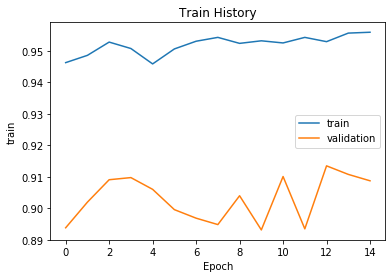

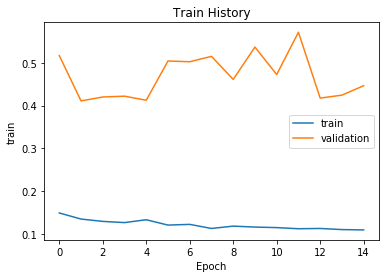

<Figure size 432x288 with 0 Axes>

In [52]:
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

In [53]:
score = model_RNN.evaluate(X_test, y_test)
print("test accuracy: ", score[1])
print(confusion_matrix(y_test, model_RNN.predict(X_test)))

2947/2947 [==============================] - 2s 630us/step
test accuracy:  0.9087207317352295
Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 521        0         0        0                   0   
SITTING                  4      436        47        0                   0   
STANDING                 0      116       414        2                   0   
WALKING                  0        1         0      455                  10   
WALKING_DOWNSTAIRS       0        0         0       11                 404   
WALKING_UPSTAIRS         0        0         0        9                  14   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            16  
SITTING                            4  
STANDING                           0  
WALKING                           30  
WALKING_DOWNSTAIRS                 5  
WALKING_

## CNN model

In [46]:
model_CNN = Sequential()

model_CNN.add(Conv2D(filters=4, kernel_size=(13,6), strides=(1,3),  input_shape=(train_row, train_col, channel)))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization(momentum=0.8))
model_CNN.add(MaxPooling2D(pool_size=(2,1), strides=(2,1)))

model_CNN.add(Conv2D(filters=16, kernel_size=(13,3), strides=(1,1)))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization(momentum=0.8))
model_CNN.add(MaxPooling2D(pool_size=(2,1), strides=(2,1)))

model_CNN.add(Conv2D(filters=64, kernel_size=(12,1), strides=(1,1)))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization(momentum=0.8))
model_CNN.add(MaxPooling2D(pool_size=(2,1), strides=(2,1)))

model_CNN.add(Dropout(0.5))
model_CNN.add(Flatten())
model_CNN.add(Dense(6, activation='softmax'))
model_CNN.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_CNN.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 116, 3, 4)         316       
_________________________________________________________________
activation_1 (Activation)    (None, 116, 3, 4)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 116, 3, 4)         16        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 3, 4)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 1, 16)         2512      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 1, 16)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 1, 16)       

In [47]:
X_train = X_train_temp.reshape(X_train_temp.shape[0],X_train_temp.shape[1],X_train_temp.shape[2],1)
X_test  = X_test_temp.reshape(X_test_temp.shape[0],X_test_temp.shape[1],X_test_temp.shape[2],1)

history = model_CNN.fit(X_train, y_train, validation_split=validation_split, batch_size=16, epochs=15)

Train on 6616 samples, validate on 736 samples
Epoch 1/15
6616/6616 [==============================] - 5s 807us/step - loss: 0.6469 - accuracy: 0.7969 - val_loss: 0.3111 - val_accuracy: 0.8709
Epoch 2/15
6616/6616 [==============================] - 5s 744us/step - loss: 0.3073 - accuracy: 0.8948 - val_loss: 0.2655 - val_accuracy: 0.8872
Epoch 3/15
6616/6616 [==============================] - 5s 787us/step - loss: 0.2381 - accuracy: 0.9126 - val_loss: 0.2710 - val_accuracy: 0.8777
Epoch 4/15
6616/6616 [==============================] - 5s 783us/step - loss: 0.2291 - accuracy: 0.9214 - val_loss: 0.1532 - val_accuracy: 0.9049
Epoch 5/15
6616/6616 [==============================] - 5s 806us/step - loss: 0.2075 - accuracy: 0.9216 - val_loss: 0.2590 - val_accuracy: 0.8818
Epoch 6/15
6616/6616 [==============================] - 6s 891us/step - loss: 0.1784 - accuracy: 0.9317 - val_loss: 0.2042 - val_accuracy: 0.8913
Epoch 7/15
6616/6616 [==============================] - 6s 833us/step - loss:

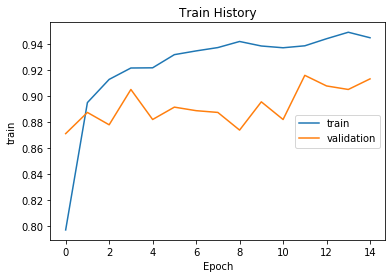

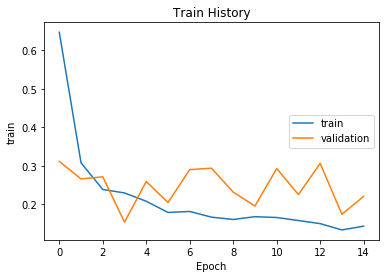

<Figure size 432x288 with 0 Axes>

In [48]:
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

In [49]:
score = model_CNN.evaluate(X_test, y_test)
print("test accuracy: ", score[1])
print(confusion_matrix(y_test, model_CNN.predict(X_test)))

2947/2947 [==============================] - 0s 161us/step
test accuracy:  0.9032914638519287
Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      428        61        1                   1   
STANDING                 0      115       411        1                   0   
WALKING                  0        2         0      421                  12   
WALKING_DOWNSTAIRS       0        0         0        5                 404   
WALKING_UPSTAIRS         0        0         5        0                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           5  
WALKING                           61  
WALKING_DOWNSTAIRS                11  
WALKING_